# silhouette score

In [340]:
import pandas as pd 

In [341]:
iris = pd.read_csv('/home/aromal/Documents/jupyter_Lab/Datasets_Main/IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [342]:
X = iris.drop(['species'], axis=1)
y = iris['species']

In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [344]:
from sklearn.preprocessing import LabelEncoder

In [345]:
encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])

In [346]:
from sklearn.cluster import KMeans

In [347]:
km = KMeans(n_clusters=3).fit(iris)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [348]:
 from sklearn.metrics import silhouette_score

In [349]:
silhouette_score(iris, km.labels_)

0.5816937070990904

# visualize sample

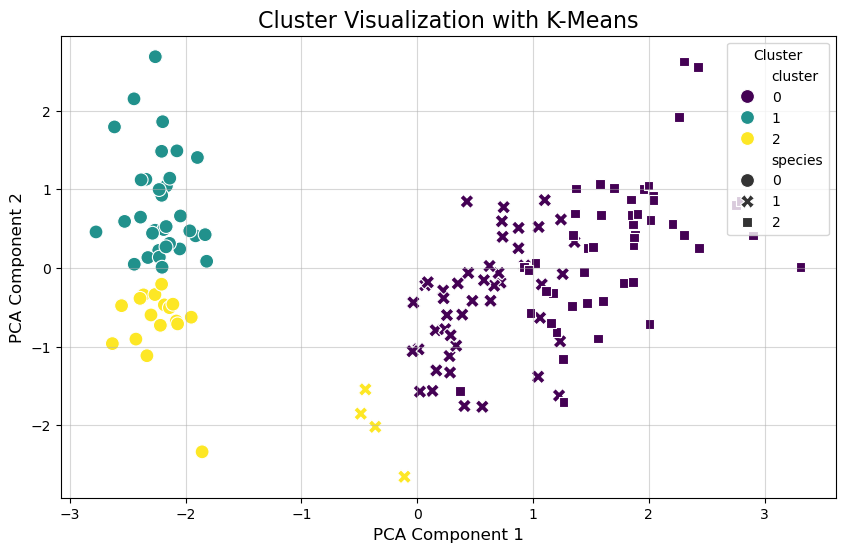

In [351]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['species'] = data.target

# Step 1: Standardize the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.drop(columns=['species']))

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris['cluster'] = kmeans.fit_predict(iris_scaled)

# Step 3: Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
iris['pca1'] = iris_pca[:, 0]
iris['pca2'] = iris_pca[:, 1]

# Step 4: Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1',
    y='pca2',
    hue='cluster',
    palette='viridis',
    data=iris,
    style='species',  # Optional: Compare clusters with species
    s=100
)
plt.title('Cluster Visualization with K-Means', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.grid(alpha=0.5)
plt.show()

In [352]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster,pca1,pca2
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,1.870503,0.386966
146,6.3,2.5,5.0,1.9,2,0,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,2,0,1.521170,0.269069
148,6.2,3.4,5.4,2.3,2,0,1.372788,1.011254


In [353]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.55


# select classifier

In [355]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
accuracy_score, 
precision_score,
recall_score, 
f1_score,
confusion_matrix, 
classification_report
)
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [356]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [358]:
# Standardizing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [359]:
# Define classifiers
classifiers = {
    "Logistic Regression" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(), 
    "Support Vector Machine" : SVC(), 
    "Decision Tree" : DecisionTreeClassifier(), 
    "K-Nearest Neighbour": KNeighborsClassifier()
}

The error occurs because the `precision_score`, `recall_score`, `f1_score`, and `roc_auc_score` functions expect a **binary classification target** by default (average='binary'). However, your 
1. **`average="micro"`**: Calculates metrics globally by counting the total true positives, false negatives, and false positives across all classes.
2. **`average="macro"`**: Calculates metrics for each class separately and then takes the unweighted mean (does not consider class imbalance).
3. **`average="weighted"`**: Calculates metrics for each class, then takes the weighted mean by the number of true instances for each class (accounts for class imbalance).

In [361]:
# Loop throught classifiers and evaluate
# Initialize a list to collect results
results_list = []
for name, clf in classifiers.items(): 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results_list.append({
        "Classifier" : name,
        "Accuracy" : accuracy, 
        "Precision" : precision, 
        "Recall" : recall, 
        "F1 Score": f1,
        "ROC_AUC": roc_auc
    })
results = pd.DataFrame(results_list)
results.sort_values(by='Accuracy', ascending=False)

NameError: name 'roc_auc_score' is not defined

In [ ]:
for name, clf in classifiers.items(): 
    y_pred = clf.predict(X_test)
    print(f'\n{name} Classification report: \n')
    print(classification_report(y_test, y_pred))
    

# KMeans

In [366]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [393]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)


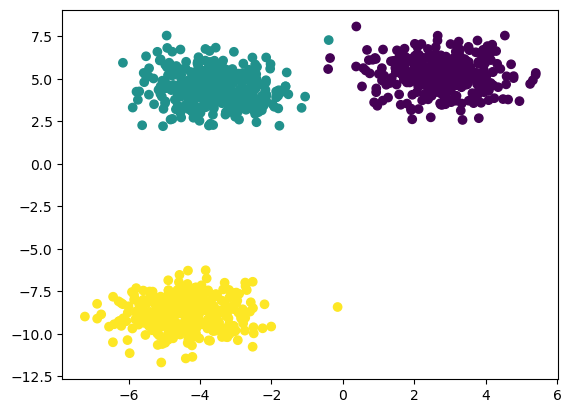

In [395]:
plt.scatter(X[:,0], X[:,1], c=y)

In [397]:
# standardization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [399]:
# Random forest hyperparamters 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfc =RandomForestClassifier()
rfr =RandomForestRegressor()
